In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, linear_sum_assignment

# Tarea 2 Optimizacion
## Carlos Tovar - 202311530

## Ejercicio 1

### Item C)

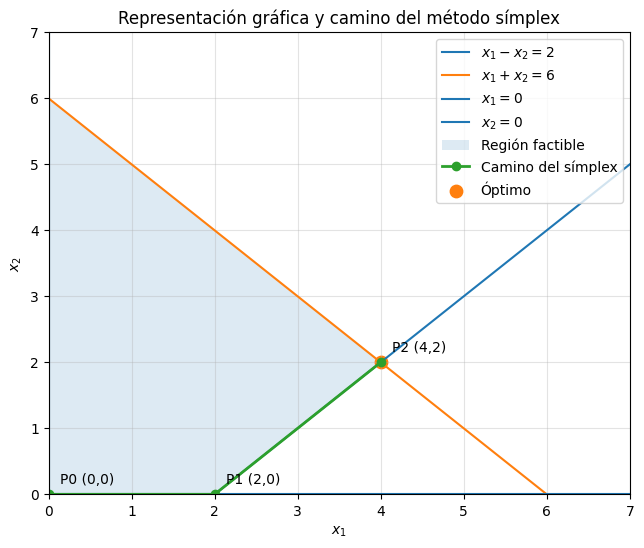

In [4]:
#Camino de soluciones básicas factibles
path = np.array([
    [0, 0],  # initial basic feasible solution
    [2, 0],  # x1 enters, s1 leaves
    [4, 2],  # x2 enters, s2 leaves
], dtype=float)

#Grid para plotear
x1 = np.linspace(0, 7, 400)
line1 = x1 - 2          # x2 = x1 - 2 (boundary of x1 - x2 = 2)
line2 = 6 - x1          # x2 = 6 - x1 (boundary of x1 + x2 = 6)

#Vertices factibles
verts = np.array([
    [0, 0],
    [2, 0],
    [4, 2],
    [0, 6]
], dtype=float)

#Grafica 
fig, ax = plt.subplots(figsize=(7.5, 6))

#Lineas de restricciones
ax.plot(x1, line1, label=r"$x_1-x_2=2$")
ax.plot(x1, line2, label=r"$x_1+x_2=6$")
ax.axvline(0, label=r"$x_1=0$")
ax.axhline(0, label=r"$x_2=0$")

#Region factible
ax.fill(verts[:, 0], verts[:, 1], alpha=0.15, label="Región factible")

#Camino de soluciones básicas factibles
ax.plot(path[:, 0], path[:, 1], marker="o", linewidth=2, label="Camino del símplex")

#Anotar los puntos
for i, (px, py) in enumerate(path):
    ax.annotate(f"P{i} ({int(px)},{int(py)})", (px, py), textcoords="offset points", xytext=(8, 8))

#Marcar el optimo
ax.scatter([path[-1, 0]], [path[-1, 1]], s=80, label="Óptimo")

ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_title("Representación gráfica y camino del método símplex")
ax.grid(True, alpha=0.35)
ax.legend(loc="upper right")

plt.show()

### Comprobacion de la solucion optima

In [6]:
c = [-2, -1]
# x1 - x2 <= 2
# x1 + x2 <= 6
A = [[1, -1], 
     [1, 1]]
b = [2, 6]

x_bounds = (0, None)
y_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

print(f"Estado: {res.message}")
print(f"Valor óptimo de x1: {res.x[0]}")
print(f"Valor óptimo de x2: {res.x[1]}")
print(f"Valor mínimo de la función (z): {res.fun}")

Estado: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Valor óptimo de x1: 4.0
Valor óptimo de x2: 2.0
Valor mínimo de la función (z): -10.0


## Ejercicio 2

### Comprobacion solucion

In [7]:
c = [0, 0, 0, -1]

A_ub = [
    [-1.75, -0.25,  5.0,   1], # Mes 1: z - 1.75x1 - 0.25x2 + 5x3 <= 0
    [ 1.5,   0.0,  -8.0,   1], # Mes 2: z + 1.5x1 - 8x3 <= 0
    [ 0.0,   0.125, -8.0,  1]  # Mes 3: z + 0.125x2 - 8x3 <= 0
]
b_ub = [0, 0, 0]

# Restricción de igualdad (x1 + x2 + x3 = 1)
# En términos de nuestras variables: 1*x1 + 1*x2 + 1*x3 + 0*z = 1
A_eq = [[1, 1, 1, 0]]
b_eq = [1]

# x1, x2, x3 entre 0 y 1; z puede ser libre (pero aquí será el rendimiento)
bounds = [(0, 1), (0, 1), (0, 1), (None, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

x1, x2, x3, z = res.x
print(f"Resultados Optimizados:")
print(f"---")
print(f"Acción 1 (x1): {x1:.2%}")
print(f"Acción 2 (x2): {x2:.2%}")
print(f"Acción 3 (x3): {x3:.2%}")
print(f"Rendimiento mínimo garantizado (z): {z:.4f}")

Resultados Optimizados:
---
Acción 1 (x1): 80.00%
Acción 2 (x2): 0.00%
Acción 3 (x3): 20.00%
Rendimiento mínimo garantizado (z): 0.4000


## Ejercicio 3

### Comprobacion solucion

In [10]:
tiempos = np.array([
    [37.7, 32.9, 33.8, 37.0, 35.4], # Espalda
    [43.3, 33.1, 42.2, 34.7, 41.8], # Pecho
    [33.3, 28.5, 38.9, 30.4, 33.6], # Mariposa
    [29.2, 26.4, 29.6, 28.5, 31.1]  # Libre
])

estilos = ["Espalda", "Pecho", "Mariposa", "Libre"]
nadadores = ["Juan", "Jorge", "Samuel", "David", "Tony"]

fila_ind, col_ind = linear_sum_assignment(tiempos)

print("Asignación Óptima:")
print("-" * 30)
tiempo_total = 0
for i, j in zip(fila_ind, col_ind):
    print(f"{estilos[i]:<10} -> {nadadores[j]:<10} ({tiempos[i, j]} seg)")
    tiempo_total += tiempos[i, j]

print("-" * 30)
print(f"Tiempo total del equipo: {tiempo_total:.1f} segundos")

Asignación Óptima:
------------------------------
Espalda    -> Samuel     (33.8 seg)
Pecho      -> David      (34.7 seg)
Mariposa   -> Jorge      (28.5 seg)
Libre      -> Juan       (29.2 seg)
------------------------------
Tiempo total del equipo: 126.2 segundos
